# Lasso Regression

Lasso regression is like linear regression, but it uses a technique "shrinkage" where the coefficients of determination are shrunk towards zero. 
Linear regression gives you regression coefficients as observed in the dataset. 
The lasso regression allows you to shrink or regularize these coefficients to avoid overfitting and make them work better on different datasets. 

# Import libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [50]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Exploratory data analysis

In [51]:
data.shape

(400, 5)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [53]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [54]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [55]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [56]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

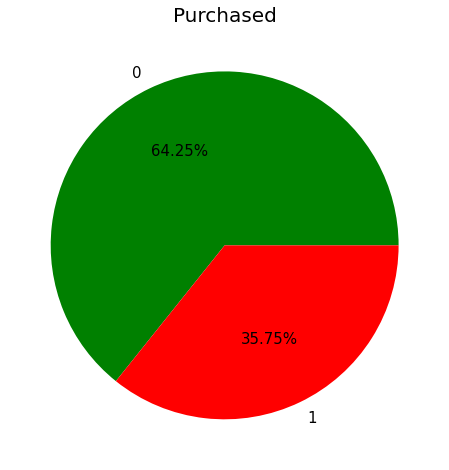

In [57]:
mycolors = ['g','r']
plt.figure(figsize = (12,8))
plt.pie(data['Purchased'].value_counts(), labels = ['0', '1'], colors=mycolors,autopct = '%.2f%%', 
        labeldistance=1.1, textprops = {'fontsize': 15})
plt.title('Purchased', fontsize=20)
plt.show()

# Data visualization

<AxesSubplot:>

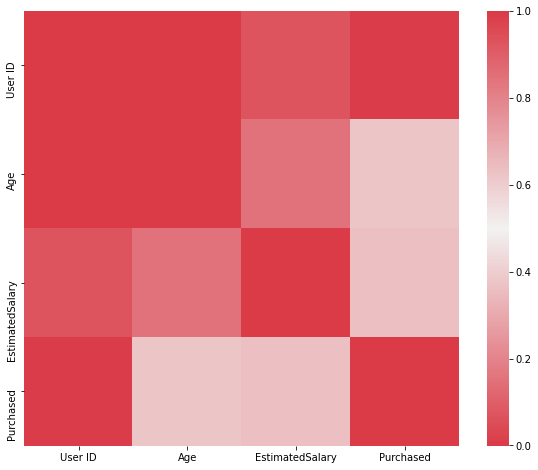

In [58]:
#Visualization of data 
# correlation plot

f, ax = plt.subplots(figsize = (10, 8))

corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(10, 10, as_cmap = True), square = True, ax = ax)

# Dataset spliting

In [61]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [62]:
x = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values
print(x.shape)
print(y.shape)

(400, 2)
(400,)


In [63]:
# Since most of the column types are object, we are not able to get the statistics of the dataframe.
# Convert them to numeric type

#Catgorical data  
#for Country Variable  
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
x[:, 1]= label_encoder_x.fit_transform(x[:, 1])  

In [64]:
#encoding for purchased variable  
labelencoder_y= LabelEncoder()  
y= labelencoder_y.fit_transform(y)  

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Build the lasso model

In [66]:
## Build the lasso model with alpha

model_lasso = Lasso(alpha=1)
model_lasso.fit(x_train, y_train)
pred_train_lasso= model_lasso.predict(x_train)
pred_test_lasso= model_lasso.predict(x_test)

# Evaluate the lasso model

In [67]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

0.37512265162773223
0.3754408347421354
0.3674051455462363
0.43345782861455673


 we have set the lasso hyperparameter - alpha as 1 or a full penalty. This alpha value is giving us a decent RMSE as of now. 
But, there might be a different alpha value which can provide us with better results. 

In [68]:
from sklearn.linear_model import LassoCV
from numpy import arange
lasso_model = LassoCV(alphas=arange(0, 1, 0.02), n_jobs=-1)

## fit model
lasso_model .fit(x, y)
pred_train_lasso= lasso_model .predict(x_train)
pred_test_lasso= lasso_model .predict(x_test)

In [69]:
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

0.3622475440854093
0.4175778191485855
0.33497761062982473
0.5290515900393362


 LassoCV has chosen the best alpha value as 0, meaning zero penalty. 
You can see that the RMSE and R-Square scores have improved slightly with the alpha value selected.
Hyper-parameter in the lasso model which can be tuned using lassoCV to control the regularization.